In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [48]:
data=pd.read_csv("usedcars.csv")
data.head()


,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [54]:
print("unique model",data['model'].unique()) #SEL, SE, SES
print("unique transmission",data['transmission'].unique()) #AUTO, MANUAL

unique model ['SEL' 'SE' 'SES']
unique transmission ['AUTO' 'MANUAL']


In [56]:
data.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


In [58]:
print(data.isna().sum()) 

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64


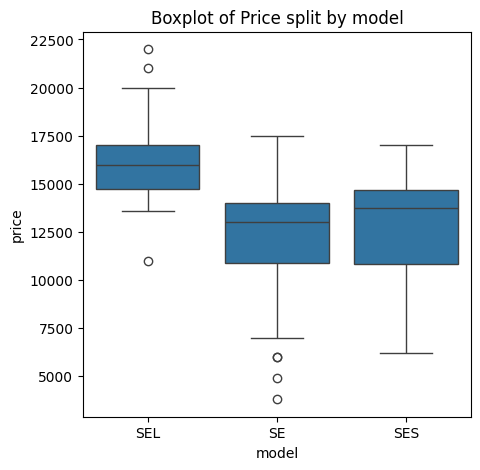

In [64]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="model",y="price",data=data)
plt.title("Boxplot of Price split by model")
plt.show()

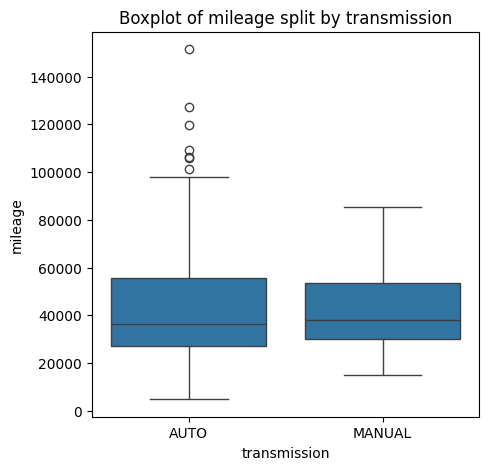

In [73]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="transmission",y="mileage",data=data)
plt.title("Boxplot of mileage split by transmission")
plt.show()

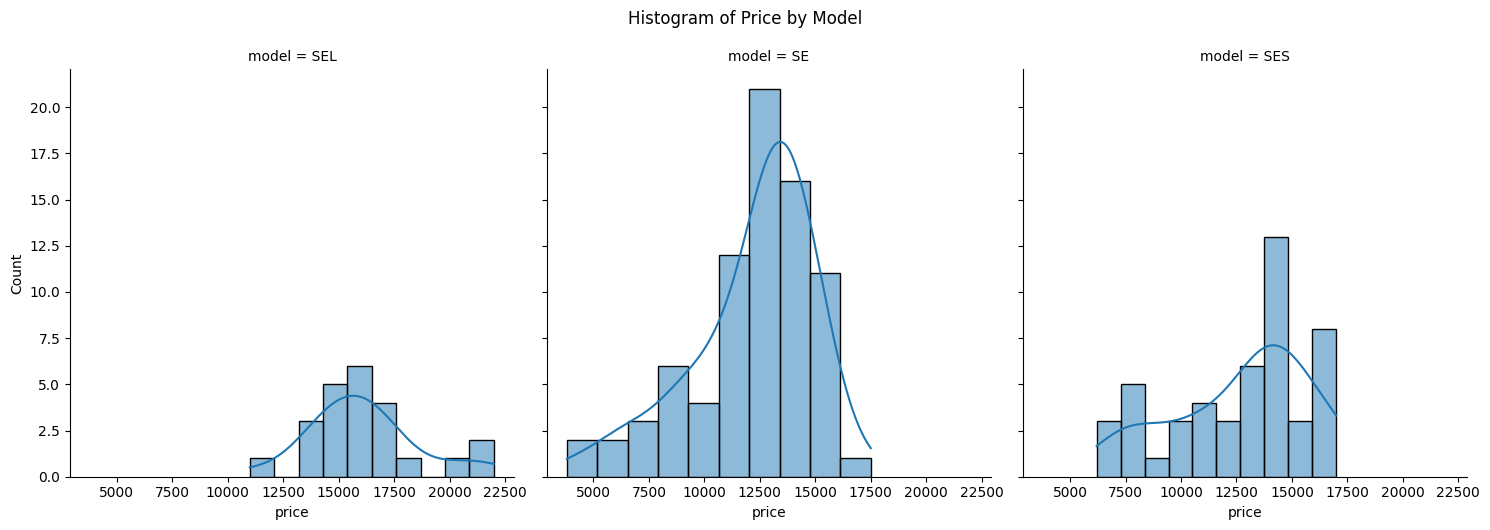

In [72]:
g = sns.FacetGrid(data, col="model", height=5, aspect=1)
g.map(sns.histplot, 'price', bins=10, kde=True)
g.fig.suptitle("Histogram of Price by Model", y=1.05)
plt.show()

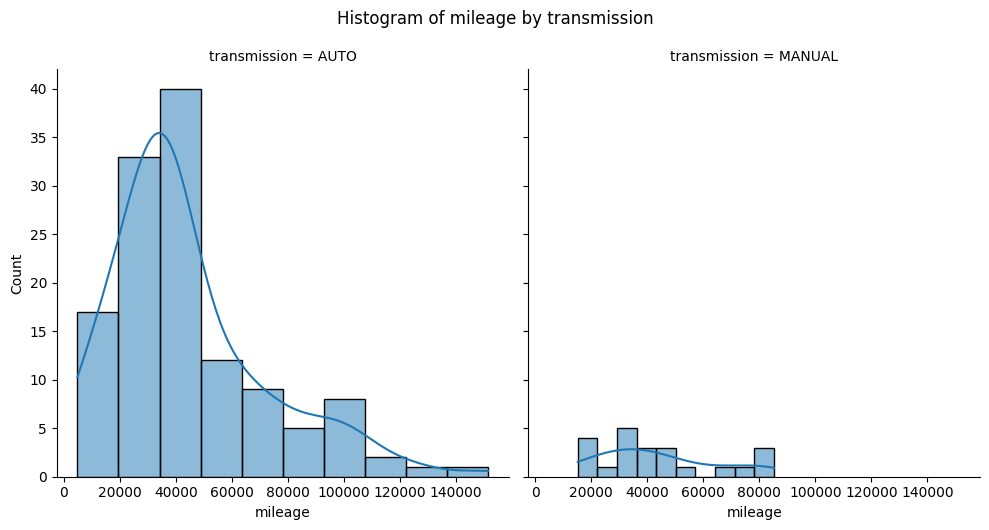

In [74]:
g = sns.FacetGrid(data, col="transmission", height=5, aspect=1)
g.map(sns.histplot, 'mileage', bins=10, kde=True)
g.fig.suptitle("Histogram of mileage by transmission", y=1.05)
plt.show()

In [71]:
price_variance=data['price'].var()
price_stdev=data['price'].std()

mileage_variance=data['mileage'].var()
mileage_stdev=data["mileage"].std()


print(f"The variance of Price is {price_variance}, and the standard deviation is {price_stdev}")
print(f"The variance of mileage is {mileage_variance}, and the standard deviation is {mileage_stdev}")

The variance of Price is 9749892.183445191, and the standard deviation is 3122.4817346855993
The variance of mileage is 728033953.6394185, and the standard deviation is 26982.104321928236


In [75]:
non_numeric_description = data.describe(include='object')
print(non_numeric_description)



       model  color transmission
count    150    150          150
unique     3      9            2
top       SE  Black         AUTO
freq      78     35          128


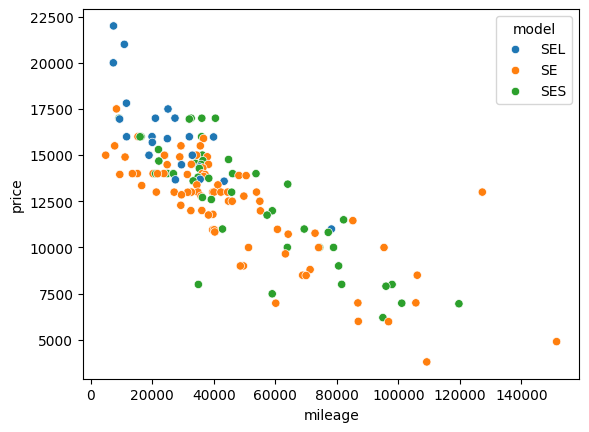

In [78]:
sns.scatterplot(data=data, x='mileage', y='price', hue='model')
plt.show()


In [79]:
pd.crosstab(data.year, data.transmission)

transmission,AUTO,MANUAL
year,,
2000,3,0
2001,1,0
2002,1,0
2003,1,0
2004,3,0
2005,2,0
2006,5,1
2007,7,4
2008,10,4


In [81]:
pd.crosstab(data.year, data.model)

model,SE,SEL,SES
year,,,
2000,3,0,0
2001,1,0,0
2002,1,0,0
2003,0,0,1
2004,1,0,2
2005,0,0,2
2006,3,0,3
2007,5,0,6
2008,11,0,3


Mean Squared Error: 2032470.34


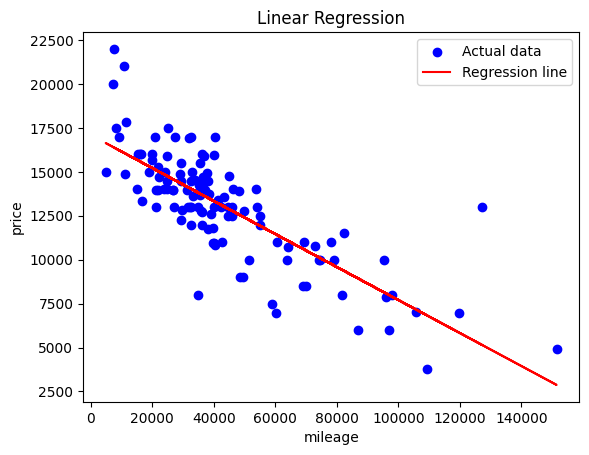

Root Mean Squared Error: 1425.65
R^2 Score: 0.77


In [86]:
# Define independent variables (X) and dependent variable (y)
X = data[['mileage']]
y = data['price']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


# Plot the regression line against the actual data
plt.scatter(X_train, y_train, color='blue', label='Actual data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Linear Regression')
plt.legend()
plt.show()

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")


# Compute R^2 score
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2:.2f}")



     Actual     Predicted
73    13663  14508.822705
18    15992  15998.178618
118   10815   9843.156692
78    13383  13854.073083
76    13425  11079.999848
31    14995  13861.958240
64    13950  16205.821078
141    6995   8939.085925
68    13888  12349.322340
82    12997  13369.511428
110   11450   9092.377126
12    16950  16211.641075
36    14989  14843.097027
9     16995  13702.659300
19    15992  14082.554886
56    13995  15189.386827
104   11984  11550.011512
69    13845  13646.618364
55    13995  15821.795171
132    8495   7126.532457
29    14999  13985.116878
127    9651  11151.247872
26    15499  16362.210020
128    9000   9526.436230
131    8800  10396.995082
145    6200   8175.164431
108   11749  11710.249161
143    6980   7599.735731
45    14495  13723.498642
30    14999  13684.823826
